# Airbnb Price Prediction

We will predict the price (`price` column) of an AirBNB listing in Boston given a number of features about the listing.

**Therefore, our unit of analysis is an AIRBNB LISTING**

# Setup

In [9]:
# Common imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

np.random.seed(42)


# Get the data

In [10]:
#We will predict the "price" value in the data set:

airbnb = pd.read_csv("airbnb.csv")
airbnb.head()

,host_is_superhost,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,...,guests_included,price_per_extra_person,minimum_nights,number_of_reviews,number_days_btw_first_last_review,review_scores_rating,cancellation_policy,price,price_gte_150,price_category
0,0,0,Roslindale,42.282619,-71.133068,House,Entire home/apt,4,1.5,2.0,...,1,0,2,0,0,NaN,moderate,250,1,gte_226
1,0,1,Roslindale,42.286241,-71.134374,Apartment,Private room,2,1.0,1.0,...,0,0,2,36,804,94.0,moderate,65,0,lte_75
2,1,1,Roslindale,42.292438,-71.135765,Apartment,Private room,2,1.0,1.0,...,1,20,3,41,2574,98.0,moderate,65,0,lte_75
3,0,0,Roslindale,42.281106,-71.121021,House,Private room,4,1.0,1.0,...,2,25,1,1,0,100.0,moderate,75,0,lte_75
4,1,1,Roslindale,42.284512,-71.136258,House,Private room,2,1.5,1.0,...,1,0,2,29,380,99.0,flexible,79,0,btw_75-150


##  Analyzing the data

<AxesSubplot:>

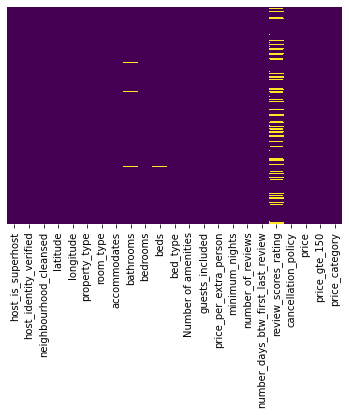

In [13]:
##Checking the null/ missing values
sns.heatmap(airbnb.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [14]:
airbnb.isnull().sum()

host_is_superhost                       0
host_identity_verified                  0
neighbourhood_cleansed                  0
latitude                                0
longitude                               0
property_type                           9
room_type                               0
accommodates                            0
bathrooms                              36
bedrooms                               30
beds                                   24
bed_type                                0
Number of amenities                     0
guests_included                         0
price_per_extra_person                  0
minimum_nights                          0
number_of_reviews                       0
number_days_btw_first_last_review       0
review_scores_rating                 2283
cancellation_policy                     0
price                                   0
price_gte_150                           0
price_category                          0
dtype: int64

# Split the data into train and test

In [15]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(airbnb, test_size=0.3)

## Check the missing values

In [16]:
train_set.isna().sum()

host_is_superhost                       0
host_identity_verified                  0
neighbourhood_cleansed                  0
latitude                                0
longitude                               0
property_type                           8
room_type                               0
accommodates                            0
bathrooms                              19
bedrooms                               19
beds                                   16
bed_type                                0
Number of amenities                     0
guests_included                         0
price_per_extra_person                  0
minimum_nights                          0
number_of_reviews                       0
number_days_btw_first_last_review       0
review_scores_rating                 1609
cancellation_policy                     0
price                                   0
price_gte_150                           0
price_category                          0
dtype: int64

In [17]:
test_set.isna().sum()

host_is_superhost                      0
host_identity_verified                 0
neighbourhood_cleansed                 0
latitude                               0
longitude                              0
property_type                          1
room_type                              0
accommodates                           0
bathrooms                             17
bedrooms                              11
beds                                   8
bed_type                               0
Number of amenities                    0
guests_included                        0
price_per_extra_person                 0
minimum_nights                         0
number_of_reviews                      0
number_days_btw_first_last_review      0
review_scores_rating                 674
cancellation_policy                    0
price                                  0
price_gte_150                          0
price_category                         0
dtype: int64

# Data Prep

In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

## Dropping the variables which are counterpart of the dependent variable

In [19]:
# We can't use the following columns, because they are for classification tasks

train = train_set.drop(['price_gte_150', 'price_category'], axis=1)
test = test_set.drop(['price_gte_150', 'price_category'], axis=1)

## Separate the target variable (we don't want to transform it)

In [20]:
train_y = train[['price']]
test_y = test[['price']]

train_inputs = train.drop(['price'], axis=1)
test_inputs = test.drop(['price'], axis=1)

##  Identify the numerical and categorical columns

In [21]:
train_inputs.dtypes

host_is_superhost                      int64
host_identity_verified                 int64
neighbourhood_cleansed                object
latitude                             float64
longitude                            float64
property_type                         object
room_type                             object
accommodates                           int64
bathrooms                            float64
bedrooms                             float64
beds                                 float64
bed_type                              object
Number of amenities                    int64
guests_included                        int64
price_per_extra_person                 int64
minimum_nights                         int64
number_of_reviews                      int64
number_days_btw_first_last_review      int64
review_scores_rating                 float64
cancellation_policy                   object
dtype: object

In [22]:
# Identify the numerical columns
numeric_columns = train_inputs.select_dtypes(include=[np.number]).columns.to_list()

# Identify the categorical columns
categorical_columns = train_inputs.select_dtypes('object').columns.to_list()

In [23]:
# Identify the binary columns so we can pass them through without transforming
binary_columns = ['host_is_superhost', 'host_identity_verified']

In [24]:
# numerical columns already includes the binary columns,
# So, we need to remove the binary columns from numerical columns.

for col in binary_columns:
    numeric_columns.remove(col)

In [25]:
binary_columns

['host_is_superhost', 'host_identity_verified']

In [26]:
numeric_columns

['latitude',
 'longitude',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'Number of amenities',
 'guests_included',
 'price_per_extra_person',
 'minimum_nights',
 'number_of_reviews',
 'number_days_btw_first_last_review',
 'review_scores_rating']

In [27]:
categorical_columns

['neighbourhood_cleansed',
 'property_type',
 'room_type',
 'bed_type',
 'cancellation_policy']

# Pipeline

In [28]:
numeric_transformer = Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='mean')),
                ('scaler', StandardScaler())])

In [29]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [30]:
binary_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))])

In [31]:
preprocessor = ColumnTransformer([
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns),
        ('binary', binary_transformer, binary_columns)],
        remainder='passthrough')



# Transform: fit_transform() for TRAIN

In [32]:
#Fit and transform the train data
train_x = preprocessor.fit_transform(train_inputs)

train_x

array([[-2.10940159, -1.39824237,  1.20477863, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.61906783, -1.38593382, -1.16133947, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.14448465, -0.16705969, -1.16133947, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.82039585,  0.74441303, -0.56980994, ...,  0.        ,
         0.        ,  0.        ],
       [-0.92762441,  0.3821493 , -0.56980994, ...,  0.        ,
         0.        ,  1.        ],
       [-0.34071414, -0.53929512, -1.16133947, ...,  0.        ,
         0.        ,  0.        ]])

In [33]:
train_x.shape

(7190, 61)

# Tranform: transform() for TEST

In [34]:
# Transform the test data
test_x = preprocessor.transform(test_inputs)

test_x

array([[ 0.63069768,  0.40533687,  1.79630816, ...,  1.        ,
         0.        ,  1.        ],
       [ 0.15153485,  0.27611111, -0.56980994, ...,  0.        ,
         0.        ,  1.        ],
       [-2.02789334, -0.91924215,  0.02171958, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.15906806, -0.38872897,  1.20477863, ...,  1.        ,
         0.        ,  1.        ],
       [ 0.11838687, -0.56878308, -0.56980994, ...,  0.        ,
         0.        ,  0.        ],
       [-0.94171792,  0.19283558, -1.16133947, ...,  0.        ,
         0.        ,  1.        ]])

In [35]:
test_x.shape

(3082, 61)

# Train a Linear Regression model

In [36]:
#Closed form solution

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(train_x, train_y)

LinearRegression()

In [37]:
from sklearn.metrics import mean_squared_error

In [38]:
#Train RMSE
reg_train_pred = lin_reg.predict(train_x)

train_mse = mean_squared_error(train_y, reg_train_pred)

train_rmse = np.sqrt(train_mse)

print('Train RMSE: {}' .format(train_rmse))

Train RMSE: 52.09177669681303


In [39]:
#Test RMSE
reg_test_pred = lin_reg.predict(test_x)

test_mse = mean_squared_error (test_y, reg_test_pred)

test_rmse = np.sqrt(test_mse)

print('Test RMSE: {}' .format(test_rmse))

Test RMSE: 53.233271579950085


# Calculate the baseline

In [40]:
#First find the average value of the target

mean_value = np.mean(train_y['price'])

mean_value

158.68289290681503

In [41]:
# Predict all values as the mean

baseline_pred = np.repeat(mean_value, len(test_y))

baseline_pred

array([158.68289291, 158.68289291, 158.68289291, ..., 158.68289291,
       158.68289291, 158.68289291])

In [42]:
baseline_mse = mean_squared_error(test_y, baseline_pred)

baseline_rmse = np.sqrt(baseline_mse)

print('Baseline RMSE: {}' .format(baseline_rmse))

Baseline RMSE: 91.62041893023937


In [43]:
train_y['price']

3437    150
6622     45
2262    100
2246    142
835     229
       ... 
5734    249
5191    100
5390    275
860     100
7270     59
Name: price, Length: 7190, dtype: int64

# Train a Stochastic Gradient Regression Model

In [44]:
from sklearn.linear_model import SGDRegressor 

# tol = stopping criterion
# eta0 = learning rate
# penalty = regularization term
# max_iter = number of passes over training data (i.e., epochs)

sgd_reg = SGDRegressor(max_iter=100, penalty=None, eta0=0.1, tol=0.0001) 

sgd_reg.fit(train_x, train_y)

/Users/siddharthmundada/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SGDRegressor(eta0=0.1, max_iter=100, penalty=None, tol=0.0001)

In [45]:
sgd_reg.n_iter_

24

In [46]:
#Train RMSE
reg_train_pred = sgd_reg.predict(train_x)

train_mse = mean_squared_error(train_y, reg_train_pred)

train_rmse = np.sqrt(train_mse)

print('Train RMSE: {}' .format(train_rmse))

Train RMSE: 53.49272703315677


In [47]:
#Test RMSE
reg_test_pred = sgd_reg.predict(test_x)

test_mse = mean_squared_error (test_y, reg_test_pred)

test_rmse = np.sqrt(test_mse)

print('Test RMSE: {}' .format(test_rmse))

Test RMSE: 54.52859667877542


# Polynomial Regression

This is done by creating the polynomial "variables" of the existing variables, then fitting them in a regular regression model


In [48]:
from sklearn.preprocessing import PolynomialFeatures

# Create second degree terms and interaction terms
poly_features = PolynomialFeatures(degree=2).fit(train_x)

train_x_poly = poly_features.transform(train_x)

test_x_poly = poly_features.transform(test_x)

#Mind you, this will create the polynomial terms of the categorical variables too

#if degree=3, then it creates all combinations: a, a^2, a^3, b, b^2, b^3, a.b, a^2.b, a.b^2, a^2.b^2 

In [49]:
#We still fit a linear regression model

pol_lin_reg = LinearRegression()

pol_lin_reg.fit(train_x_poly, train_y)

LinearRegression()

In [50]:
#Train RMSE
reg_train_pred = pol_lin_reg.predict(train_x_poly)

train_mse = mean_squared_error(train_y, reg_train_pred)

train_rmse = np.sqrt(train_mse)

print('Train RMSE: {}' .format(train_rmse))

Train RMSE: 39.142107284807906


In [51]:
#Test RMSE
reg_test_pred = pol_lin_reg.predict(test_x_poly)

test_mse = mean_squared_error (test_y, reg_test_pred)

test_rmse = np.sqrt(test_mse)

print('Test RMSE: {}' .format(test_rmse))

Test RMSE: 1618770616.5607743


## L2 Regularization

In [52]:
# Closed form solution:
# Remember, alpha is the magnitude of regularization

from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.1, solver='cholesky')

ridge_reg.fit(train_x, train_y)

Ridge(alpha=0.1, solver='cholesky')

In [53]:
#Train RMSE
reg_train_pred = ridge_reg.predict(train_x)

train_mse = mean_squared_error(train_y, reg_train_pred)

train_rmse = np.sqrt(train_mse)

print('Train RMSE: {}' .format(train_rmse))

Train RMSE: 52.08952276885408


In [54]:
#Test RMSE
reg_test_pred = ridge_reg.predict(test_x)

test_mse = mean_squared_error (test_y, reg_test_pred)

test_rmse = np.sqrt(test_mse)

print('Test RMSE: {}' .format(test_rmse))

Test RMSE: 53.22021557413279


### Stochastic Gradient Descent version:

In [55]:
#Stochastic Gradient:

sgd_reg_L2 = SGDRegressor(max_iter=50, penalty='l2', alpha = 0.1, eta0=0.1, tol=0.0001)

sgd_reg_L2.fit(train_x, train_y)

/Users/siddharthmundada/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SGDRegressor(alpha=0.1, eta0=0.1, max_iter=50, tol=0.0001)

In [56]:
#Train RMSE
reg_train_pred = sgd_reg_L2.predict(train_x)

train_mse = mean_squared_error(train_y, reg_train_pred)

train_rmse = np.sqrt(train_mse)

print('Train RMSE: {}' .format(train_rmse))

Train RMSE: 56.84934089809479


In [57]:
#Test RMSE
reg_test_pred = sgd_reg_L2.predict(test_x)

test_mse = mean_squared_error (test_y, reg_test_pred)

test_rmse = np.sqrt(test_mse)

print('Test RMSE: {}' .format(test_rmse))

Test RMSE: 57.86916934448887


## L1 Regularization

In [58]:
# Closed form solution:
# Remember, alpha is the magnitude of regularization

from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1, max_iter=100000)

lasso_reg.fit(train_x, train_y)

Lasso(alpha=0.1, max_iter=100000)

In [59]:
#Train RMSE
reg_train_pred = lasso_reg.predict(train_x)

train_mse = mean_squared_error(train_y, reg_train_pred)

train_rmse = np.sqrt(train_mse)

print('Train RMSE: {}' .format(train_rmse))

Train RMSE: 52.331211061812795


In [60]:
#Test RMSE
reg_test_pred = lasso_reg.predict(test_x)

test_mse = mean_squared_error (test_y, reg_test_pred)

test_rmse = np.sqrt(test_mse)

print('Test RMSE: {}' .format(test_rmse))

Test RMSE: 53.350732030903835


### Stochastic Gradient Descent version:

In [61]:
#Stochastic Gradient:
sgd_reg_L1 = SGDRegressor(max_iter=50, penalty='l1', alpha = 0.1, eta0=0.1, tol=0.0001)

sgd_reg_L1.fit(train_x, train_y)

/Users/siddharthmundada/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SGDRegressor(alpha=0.1, eta0=0.1, max_iter=50, penalty='l1', tol=0.0001)

In [62]:
#Train RMSE
reg_train_pred = sgd_reg_L1.predict(train_x)

train_mse = mean_squared_error(train_y, reg_train_pred)

train_rmse = np.sqrt(train_mse)

print('Train RMSE: {}' .format(train_rmse))

Train RMSE: 53.091965568668705


In [63]:
#Test RMSE
reg_test_pred = sgd_reg_L1.predict(test_x)

test_mse = mean_squared_error (test_y, reg_test_pred)

test_rmse = np.sqrt(test_mse)

print('Test RMSE: {}' .format(test_rmse))

Test RMSE: 54.166118305311414


## ElasticNet

In [64]:
# Remember, alpha is the magnitude of regularization
# And, l1_ratio is how much L1 vs. L2 regularization to do.

from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)

elastic_net.fit(train_x, train_y)

ElasticNet(alpha=0.1)

In [65]:
#Train RMSE
reg_train_pred = elastic_net.predict(train_x)

train_mse = mean_squared_error(train_y, reg_train_pred)

train_rmse = np.sqrt(train_mse)

print('Train RMSE: {}' .format(train_rmse))

Train RMSE: 54.507547942214025


In [66]:
#Test RMSE
reg_test_pred = elastic_net.predict(test_x)

test_mse = mean_squared_error (test_y, reg_test_pred)

test_rmse = np.sqrt(test_mse)

print('Test RMSE: {}' .format(test_rmse))

Test RMSE: 55.46856914320023


### Stochastic Gradient Descent version:

In [67]:
#Stochastic Gradient:
sgd_reg_elastic = SGDRegressor(max_iter=50, penalty='elasticnet', l1_ratio=0.5, alpha = 0.1, 
                          eta0=0.1, tol=0.0001)
sgd_reg_elastic.fit(train_x, train_y)

/Users/siddharthmundada/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SGDRegressor(alpha=0.1, eta0=0.1, l1_ratio=0.5, max_iter=50,
             penalty='elasticnet', tol=0.0001)

In [68]:
#Train RMSE
reg_train_pred = sgd_reg_elastic.predict(train_x)

train_mse = mean_squared_error(train_y, reg_train_pred)

train_rmse = np.sqrt(train_mse)

print('Train RMSE: {}' .format(train_rmse))

Train RMSE: 56.18688482880784


In [69]:
#Test RMSE
reg_test_pred = sgd_reg_elastic.predict(test_x)

test_mse = mean_squared_error (test_y, reg_test_pred)

test_rmse = np.sqrt(test_mse)

print('Test RMSE: {}' .format(test_rmse))

Test RMSE: 57.1431793278226


## Early Stopping

In [70]:
np.random.seed(42)

sgd_reg_ES = SGDRegressor(max_iter=500, early_stopping = True, n_iter_no_change=5, 
                          validation_fraction=0.2,
                          eta0=0.01, tol=0.0001)

In [71]:
sgd_reg_ES.fit(train_x, train_y)

/Users/siddharthmundada/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SGDRegressor(early_stopping=True, max_iter=500, tol=0.0001,
             validation_fraction=0.2)

### Number of iterations with early stopping

In [72]:
sgd_reg_ES.n_iter_

10

In [73]:
#Train RMSE
reg_train_pred = sgd_reg_ES.predict(train_x)

train_mse = mean_squared_error(train_y, reg_train_pred)

train_rmse = np.sqrt(train_mse)

print('Train RMSE: {}' .format(train_rmse))

Train RMSE: 52.71993716974844


In [74]:
#Test RMSE
reg_test_pred = sgd_reg_ES.predict(test_x)

test_mse = mean_squared_error (test_y, reg_test_pred)

test_rmse = np.sqrt(test_mse)

print('Test RMSE: {}' .format(test_rmse))

Test RMSE: 53.876320870343726


### Number of iterations without early stopping

In [75]:
np.random.seed(42)

sgd_reg_ES = SGDRegressor(max_iter=500, eta0=0.01, tol=0.0001)

In [76]:
sgd_reg_ES.fit(train_x, train_y)

/Users/siddharthmundada/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SGDRegressor(max_iter=500, tol=0.0001)

In [77]:
sgd_reg_ES.n_iter_

32

In [78]:
#Train RMSE
reg_train_pred = sgd_reg_ES.predict(train_x)

train_mse = mean_squared_error(train_y, reg_train_pred)

train_rmse = np.sqrt(train_mse)

print('Train RMSE: {}' .format(train_rmse))

Train RMSE: 52.31331426735282


In [79]:
#Test RMSE
reg_test_pred = sgd_reg_ES.predict(test_x)

test_mse = mean_squared_error (test_y, reg_test_pred)

test_rmse = np.sqrt(test_mse)

print('Test RMSE: {}' .format(test_rmse))

Test RMSE: 53.35917951338368


## Remember: Polynomial model has severe overfitting. Perfom regualization on it?

## ElasticNet

In [80]:
# Remember, alpha is the magnitude of regularization
# And, l1_ratio is how much L1 vs. L2 regularization to do.

from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.05, l1_ratio=0.5)

elastic_net.fit(train_x_poly, train_y)

/Users/siddharthmundada/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37289.250254273415, tolerance: 5881.530499582755
  model = cd_fast.enet_coordinate_descent(


ElasticNet(alpha=0.05)

In [81]:
#Train RMSE
reg_train_pred = elastic_net.predict(train_x_poly)

train_mse = mean_squared_error(train_y, reg_train_pred)

train_rmse = np.sqrt(train_mse)

print('Train RMSE: {}' .format(train_rmse))

Train RMSE: 45.108028914993376


In [82]:
#Test RMSE
reg_test_pred = elastic_net.predict(test_x_poly)

test_mse = mean_squared_error (test_y, reg_test_pred)

test_rmse = np.sqrt(test_mse)

print('Test RMSE: {}' .format(test_rmse))

Test RMSE: 48.24523668264204


## LinearSVR
This is the support vector regressor. Preferred over SVR(kernel='linear')

In [83]:
from sklearn.svm import LinearSVR 

svm_reg = LinearSVR(C=100, epsilon=0.5, max_iter=10000) 

svm_reg.fit(train_x, train_y)

/Users/siddharthmundada/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LinearSVR(C=100, epsilon=0.5, max_iter=10000)

In [84]:
#Train RMSE
svm_train_pred = svm_reg.predict(train_x)

train_mse = mean_squared_error(train_y, svm_train_pred)

train_rmse = np.sqrt(train_mse)

print('Train RMSE: {}' .format(train_rmse))

Train RMSE: 53.11562650201621


In [85]:
#Test RMSE
svm_test_pred = svm_reg.predict(test_x)

test_mse = mean_squared_error(test_y, svm_test_pred)

test_rmse = np.sqrt(test_mse)

print('Test RMSE: {}' .format(test_rmse))

Test RMSE: 54.14163330234393


## SVR(kernel='poly')

In [86]:
from sklearn.svm import SVR 

svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.5) 

svm_poly_reg.fit(train_x, train_y)

/Users/siddharthmundada/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR(C=100, degree=2, epsilon=0.5, kernel='poly')

In [87]:
#Train RMSE
svm_train_pred = svm_poly_reg.predict(train_x)

train_mse = mean_squared_error(train_y, svm_train_pred)

train_rmse = np.sqrt(train_mse)

print('Train RMSE: {}' .format(train_rmse))

Train RMSE: 45.99688839781939


In [88]:
#Test RMSE
svm_test_pred = svm_poly_reg.predict(test_x)

test_mse = mean_squared_error(test_y, svm_test_pred)

test_rmse = np.sqrt(test_mse)

print('Test RMSE: {}' .format(test_rmse))

Test RMSE: 49.276888776184414


## SVR(kernel='rbf')

In [95]:
#Takes too long to converge

svm_rbf_reg = SVR(kernel="rbf", C=100, epsilon=0.01, gamma='scale') 

svm_rbf_reg.fit(train_x, train_y)

/Users/siddharthmundada/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR(C=100, epsilon=0.01)

In [96]:
#Train RMSE
svm_train_pred = svm_rbf_reg.predict(train_x)

train_mse = mean_squared_error(train_y, svm_train_pred)

train_rmse = np.sqrt(train_mse)

print('Train RMSE: {}' .format(train_rmse))

Train RMSE: 37.784450316089575


In [97]:
#Test RMSE
svm_test_pred = svm_rbf_reg.predict(test_x)

test_mse = mean_squared_error(test_y, svm_test_pred)

test_rmse = np.sqrt(test_mse)

print('Test RMSE: {}' .format(test_rmse))

Test RMSE: 42.60969329891056


### Till now SVR(kernel='rbf') is the best model since with this model we are able to get the lowest RMSE on test data set. 

## Cross Validation
We perform k-fold cross-validation.

In [98]:
from sklearn.model_selection import cross_validate

In [99]:
scores = cross_validate(svm_rbf_reg, train_x, 
                        train_y, cv=5, scoring="neg_mean_squared_error",
                        return_estimator=True)

/Users/siddharthmundada/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/siddharthmundada/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/siddharthmundada/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/siddharthmundada/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expec

In [100]:
scores

{'fit_time': array([4.14343095, 4.19620991, 4.18051195, 4.01032114, 4.16149402]),
 'score_time': array([0.50775695, 0.50619388, 0.52559304, 0.49871397, 0.50656891]),
 'estimator': (SVR(C=100, epsilon=0.01),
  SVR(C=100, epsilon=0.01),
  SVR(C=100, epsilon=0.01),
  SVR(C=100, epsilon=0.01),
  SVR(C=100, epsilon=0.01)),
 'test_score': array([-1711.30993728, -2112.61064944, -1711.47735998, -2097.54914461,
        -1984.72842291])}

In [101]:
# test scores are negative and squared

scores['test_score']

array([-1711.30993728, -2112.61064944, -1711.47735998, -2097.54914461,
       -1984.72842291])

In [102]:
rmse_scores = np.sqrt(-scores['test_score'])

rmse_scores

array([41.36798203, 45.96314447, 41.37000556, 45.79900812, 44.55029094])

In [103]:
rmse_scores.mean(), rmse_scores.std()

(43.81008622350846, 2.0521812624666347)

In [104]:
# How can you make predictions: Use each estimator...

test_predictions = pd.DataFrame()

test_predictions['estimator_0'] = scores['estimator'][0].predict(test_x)
test_predictions['estimator_1'] = scores['estimator'][1].predict(test_x)
test_predictions['estimator_2'] = scores['estimator'][2].predict(test_x)
test_predictions['estimator_3'] = scores['estimator'][3].predict(test_x)
test_predictions['estimator_4'] = scores['estimator'][4].predict(test_x)

In [105]:
test_predictions

,estimator_0,estimator_1,estimator_2,estimator_3,estimator_4
0,385.732968,381.779094,364.449493,366.882267,362.409963
1,149.990099,149.990101,147.849009,150.010249,149.989852
2,70.010454,69.990098,81.966305,70.009690,70.010234
3,92.423031,85.927359,92.989761,91.568603,88.612357
4,91.319999,77.836522,88.014999,81.631724,84.188518
...,...,...,...,...,...
3077,51.989892,52.010040,51.190998,52.009796,52.010076
3078,150.009752,150.009867,150.009978,155.310265,150.010117
3079,359.445053,368.008951,371.600687,359.796627,371.376166
3080,74.989881,74.989907,67.969237,72.725719,61.091385


In [106]:
# Take the average of all predictions:

test_predictions['avg_prediction'] = np.mean(test_predictions, axis=1)

test_predictions

,estimator_0,estimator_1,estimator_2,estimator_3,estimator_4,avg_prediction
0,385.732968,381.779094,364.449493,366.882267,362.409963,372.250757
1,149.990099,149.990101,147.849009,150.010249,149.989852,149.565862
2,70.010454,69.990098,81.966305,70.009690,70.010234,72.397356
3,92.423031,85.927359,92.989761,91.568603,88.612357,90.304222
4,91.319999,77.836522,88.014999,81.631724,84.188518,84.598353
...,...,...,...,...,...,...
3077,51.989892,52.010040,51.190998,52.009796,52.010076,51.842160
3078,150.009752,150.009867,150.009978,155.310265,150.010117,151.069996
3079,359.445053,368.008951,371.600687,359.796627,371.376166,366.045497
3080,74.989881,74.989907,67.969237,72.725719,61.091385,70.353226


In [107]:
# Test RMSE

test_mse = mean_squared_error(test_y, test_predictions['avg_prediction'])

test_rmse = np.sqrt(test_mse)

print('Test RMSE: {}' .format(test_rmse))

Test RMSE: 43.31333296988132
